# Bike Sharing Demand Practice for AIFFEL
### 1.1 Data Loading... 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data_path ='/kaggle/input/bike-sharing-demand/'
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv')

checking train and test shape

In [ ]:
train.shape,  test.shape

((10886, 12), (6493, 9))

head of train, test, submission table

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
all_data=pd.concat([train,test])

### 1.2 Feature Engineering For more Effective Analysis

In [ ]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[1])

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [ ]:
print(train['datetime'][100].split()[0])                 # date
print(train['datetime'][100].split()[0].split('-'))      # dividing string by '-' 
print(train['datetime'][100].split()[0].split('-')[0])   # year
print(train['datetime'][100].split()[0].split('-')[1])   # month
print(train['datetime'][100].split()[0].split('-')[2])   # day

2011-01-05
['2011', '01', '05']
2011
01
05


In [ ]:
print(train['datetime'][100].split()[1])                # time
print(train['datetime'][100].split()[1].split(':'))     # dividing string by ':'
print(train['datetime'][100].split()[1].split(':')[0])  # hour
print(train['datetime'][100].split()[1].split(':')[1])  # minute
print(train['datetime'][100].split()[1].split(':')[2])  # second

09:00:00
['09', '00', '00']
09
00
00


In [ ]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성
# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [ ]:
from datetime import datetime      # datatime 라이브러리 임포트
import calendar

print(train['date'][100])     # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))                              # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())                    # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) # 문자열로 요일 반환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [ ]:
train['weekday'] = train['date'].apply(lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [ ]:
train['season']=train['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
train['weather']=train['weather'].map({1:'Clear',2:'Mist, Few clouds',3:'Light Snow, Rain, Thunder',
                                       4:'Heavy Snow, Rain, Thunder'})

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### 1.3 데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

분포도

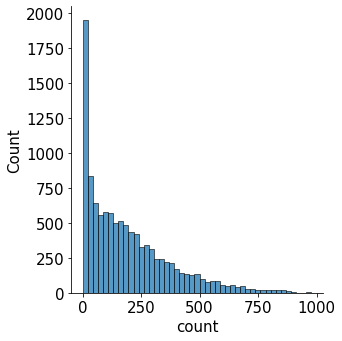

In [ ]:
mpl.rc('font',size=15)
sns.displot(train['count']);

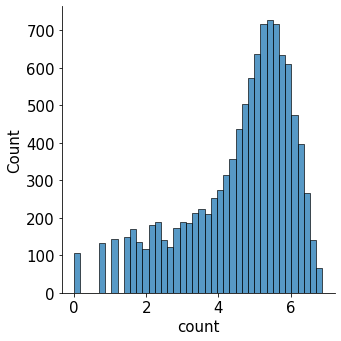

In [ ]:
sns.displot(np.log(train['count']));

막대 그래프

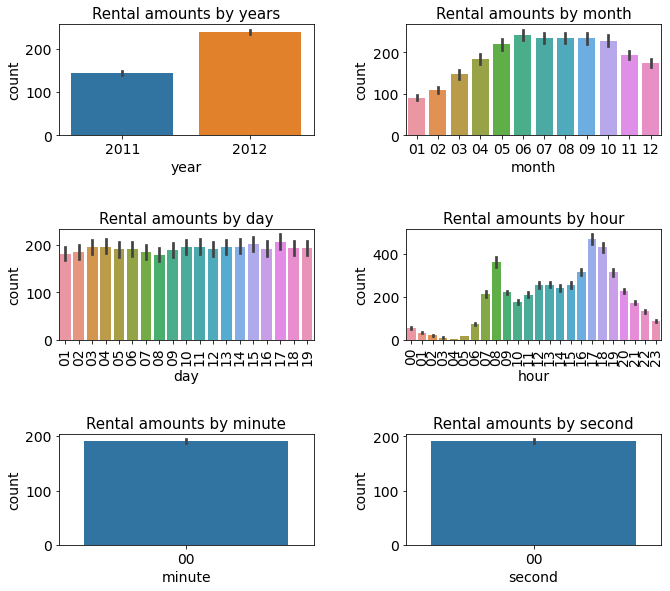

In [ ]:
mpl.rc('font',size=14)
mpl.rc('axes',titlesize=15)
figure,axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 9)

sns.barplot(x='year',y='count',data=train, ax=axes[0, 0])
sns.barplot(x='month',y='count',data=train, ax=axes[0, 1])
sns.barplot(x='day',y='count',data=train, ax=axes[1, 0])
sns.barplot(x='hour',y='count',data=train, ax=axes[1, 1])
sns.barplot(x='minute',y='count',data=train, ax=axes[2, 0])
sns.barplot(x='second',y='count',data=train, ax=axes[2, 1])

axes[0, 0].set(title='Rental amounts by years')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

박스 플롯

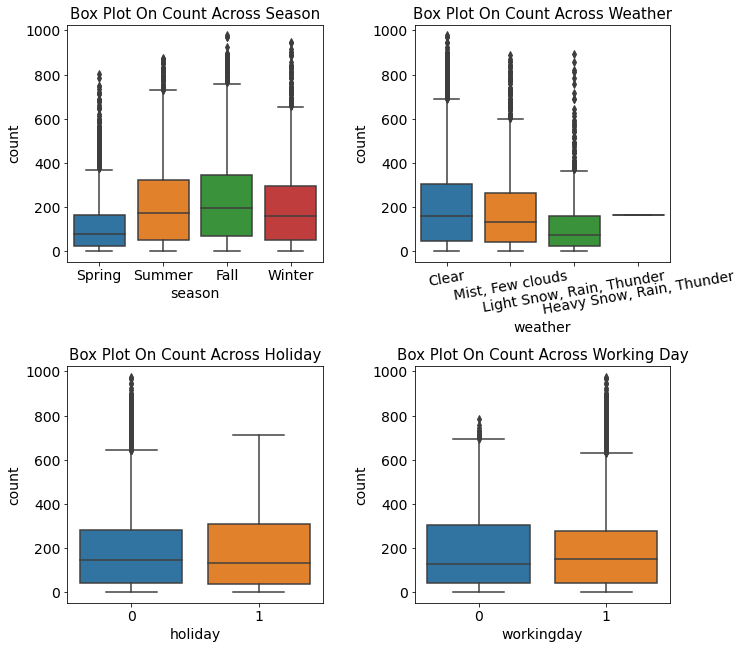

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(x='season',y='count',data=train,ax=axes[0, 0])
sns.boxplot(x='weather',y='count',data=train,ax=axes[0, 1])
sns.boxplot(x='holiday',y='count',data=train,ax=axes[1, 0])
sns.boxplot(x='workingday',y='count',data=train,ax=axes[1, 1])

axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

axes[0, 1].tick_params('x',labelrotation=10)

포인트 플롯

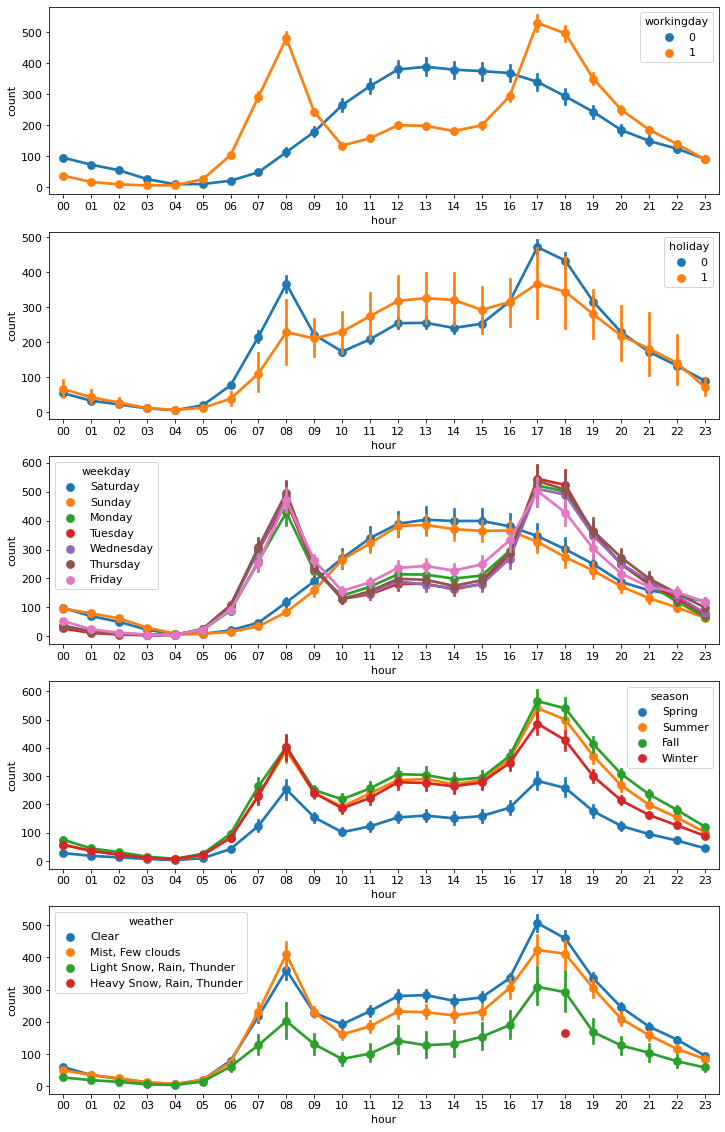

In [ ]:
mpl.rc('font',size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 20)

sns.pointplot(x='hour',y='count',data=train, hue='workingday',ax=axes[0])
sns.pointplot(x='hour',y='count',data=train, hue='holiday',ax=axes[1])
sns.pointplot(x='hour',y='count',data=train, hue='weekday',ax=axes[2])
sns.pointplot(x='hour',y='count',data=train, hue='season',ax=axes[3])
sns.pointplot(x='hour',y='count',data=train, hue='weather',ax=axes[4]);

회귀선을 포함한 산점도 그래프

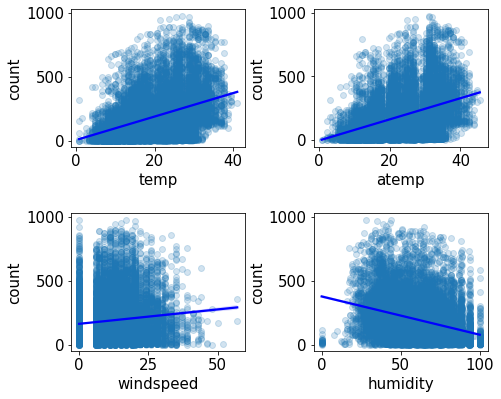

In [ ]:
mpl.rc('font',size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(x='temp',y='count',data=train,ax=axes[0, 0],scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp',y='count',data=train,ax=axes[0, 1],scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed',y='count',data=train,ax=axes[1, 0],scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity',y='count',data=train,ax=axes[1, 1],scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});

히트맵

In [ ]:
train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


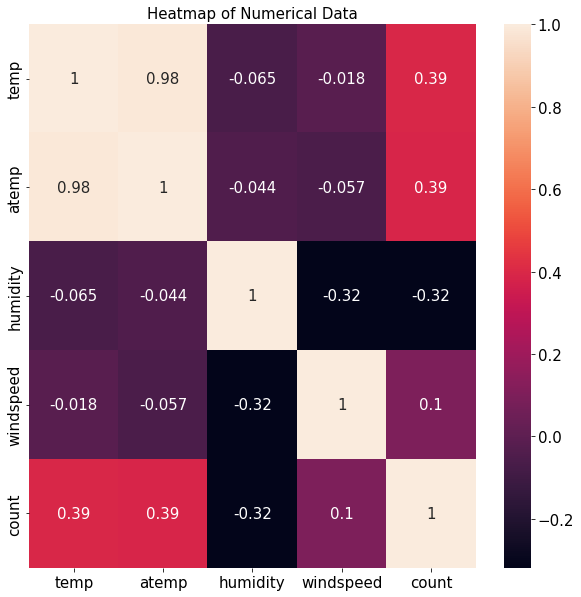

In [ ]:
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data');

## 2. 자전거 대여 수요 예측 경진대회 베이스라인 모델 

In [ ]:
import pandas as pd
data_path ='/kaggle/input/bike-sharing-demand/'

train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv') 

### 2.1 피처 엔지니어링

이상치 제거

In [ ]:
train = train[train['weather']!=4]

파생변수(피처)추가

In [ ]:
from datetime import datetime
all_data['date']=all_data['datetime'].apply(lambda x: x.split()[0])
all_data['year']=all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
all_data['month']=all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
all_data['hour']=all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
all_data['weekday']=all_data['date'].apply(lambda dateString: datetime.strptime(dateString,"%Y-%m-%d").weekday())

데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.DataFrame(all_data)
y = df.fillna(0)['count']
y = df.fillna(0)['casual']
y = df.il
X = all_data.drop(['datetime','date','windspeed','registered','casual'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=10)

In [ ]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,hour,weekday
2157,3,0,1,2,24.60,27.275,88,2011,09,10,2
346,1,0,0,2,12.30,15.910,42,2011,01,22,5
5968,4,0,1,1,13.94,18.180,81,2012,11,00,2
1684,3,0,1,1,29.52,35.605,84,2011,07,04,0
1149,1,0,0,1,14.76,16.665,51,2011,03,13,5
...,...,...,...,...,...,...,...,...,...,...,...
4829,4,0,1,1,18.04,21.970,72,2011,11,07,0
10201,4,0,0,1,16.40,20.455,58,2012,11,11,5
9372,3,0,1,1,25.42,30.305,65,2012,09,21,3
7291,2,0,1,2,18.86,22.725,88,2012,05,04,3


In [ ]:
y_train

2157       0.0
346       26.0
5968       0.0
1684       0.0
1149     157.0
         ...  
4829     322.0
10201    466.0
9372     317.0
7291       2.0
7293     136.0
Name: count, Length: 15641, dtype: float64

In [ ]:
y_test

6557    274.0
851       0.0
4952    200.0
2853    365.0
3697    104.0
        ...  
1832      0.0
4570    179.0
4809      0.0
6822    268.0
627     199.0
Name: count, Length: 1738, dtype: float64

In [ ]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,hour,weekday
6557,1,0,0,1,12.30,13.635,33,2012,03,11,5
851,2,0,0,1,27.06,31.060,65,2011,04,11,6
4952,4,0,0,1,13.12,15.150,45,2011,11,10,5
2853,3,0,1,1,33.62,38.635,52,2011,07,19,3
3697,3,0,0,2,29.52,34.090,70,2011,09,23,6
...,...,...,...,...,...,...,...,...,...,...,...
1832,3,0,0,1,31.16,34.850,55,2011,07,08,6
4570,4,0,1,1,20.50,24.240,51,2011,11,12,3
4809,3,0,1,1,28.70,32.575,61,2012,06,05,4
6822,2,0,1,1,18.86,22.725,31,2012,04,14,0


### 2.2 평가지표 계산 함수 작성

In [ ]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
      y_true = np.exp(y_true)
      y_pred = np.exp(y_pred)

    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1)) 

    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output 

### 2.3 모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()

In [ ]:
log_y = np.log(y_train+1)
linear_reg_model.fit(X_train, log_y)

LinearRegression()

### 2.4 모델 성능 검증

In [ ]:
preds = linear_reg_model.predict(X_train)

In [ ]:
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True): .4f}')

선형회귀의 RMSLE 값 :  2.1086


### 2.5 예측 및 결과 제출

In [ ]:
linear_reg_preds = linear_reg_model.predict(X_train)

## 3. 자전거 대여 수요 예측 경진대회 모델 성능 개선

In [ ]:
import pandas as pd
data_path ='/kaggle/input/bike-sharing-demand/'

train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv') 

### 피처 엔지니어링

이상치 제거

In [ ]:
train = train[train['weather']!=4]

파생 변수(피처) 추가

In [ ]:
from datetime import datetime

# 날짜 피처
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

필요 없는 피처 제거

In [ ]:
drop_features = ['casual','registered','datetime','date','windspeed','month']
all_data = all_data.drop(drop_features, axis=1)

데이터 나누기

### 평가지표 계산 함수 작성

In [ ]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

## 성능 개선 1 : 릿지 회귀 모델

### 하이퍼 파라미터 최적화(모델훈련)

모델 생성

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

그리드서치 객체 생성

In [ ]:
ridge_params = {'max_iter':[3000], 'alpha':[0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, scoring=rmsle_scorer,cv=5)

그리드 서치 수행

In [ ]:
log_y = np.log(y_train+1)
gridsearch_ridge_model.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [ ]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 200, 'max_iter': 3000}


### 3.1.2 성능 검증

In [ ]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값 : 2.1087


## 3.2 성능 개선 II : 라쏘 회귀 모델
### 3.2.1 하이퍼 파라미터 최적화(모델 훈련)


In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_alpha = 1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,param_grid=lasso_params,scoring=rmsle_scorer,cv=5)

log_y = np.log(y_train+1)
gridsearch_lasso_model.fit(X_train, log_y)
print('최적 하이퍼파라미터 :',gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.0025, 'max_iter': 3000}


### 3.2.2 성능 검증

In [ ]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 2.1087


## 3.3 성능 개선 lll : 랜덤 포레스트 회귀 모델
### 3.3.1 하이퍼 파라미터 최적화(모델 훈련)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()
rf_params = {'random_state':[42], 'n_estimators':[100,120,140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
log_y = np.log(y_train+1)
gridsearch_random_forest_model.fit(X_train, log_y)
print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


### 3.3.2 모델 성능 검증

In [ ]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.4361


### 3.3.3 예측 및 결과 제출

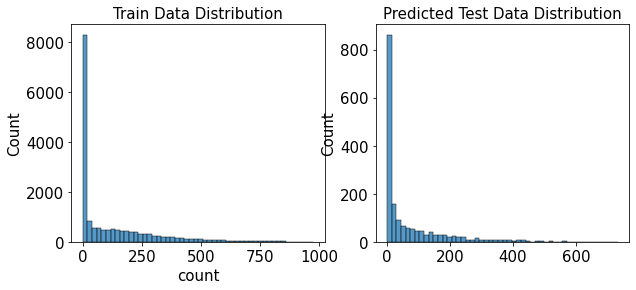

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [ ]:
submission.to_csv('Second_submission.csv',index=False)

## 3.4. 성능 개선 IV : Cross Validation
1. At first, Divide the dataset into k-subsets.Let k=5. 
2. Reserve 1 part for testing and train the algorithm over the 4 parts. 
3. In each iteration, we changes the testing part and trains the algorithm over the other parts. then the errors and accuracies are averaged. 
4. finally, we get a average accuracy of the algorithm. 
$\rightarrow$ This is called K-Fold Cross Validation.


In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
kfold = KFold(n_splits=5, random_state=10, shuffle=True) # k=10, 
# split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.373727,0.002789
Radial Svm,0.373612,0.002737
Logistic Regression,0.373612,0.002737
KNN,0.365959,0.002011
Decision Tree,0.306116,0.005496
Naive Bayes,0.001381,0.000953
Random Forest,0.367455,0.004018


## Other Aspects : EDA

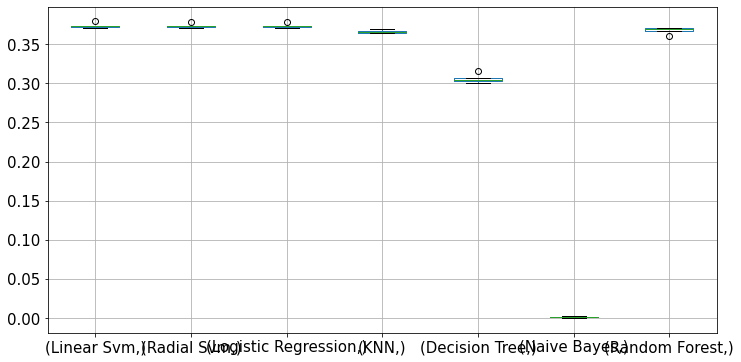

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
plt.rc('xtick',labelsize=5)
box.T.boxplot();

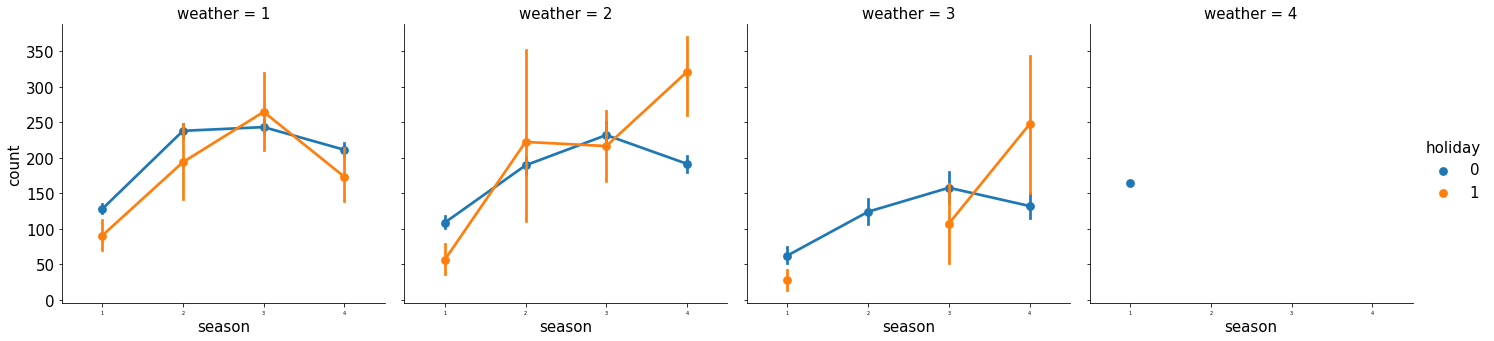

In [ ]:
g=sns.factorplot(x='season',y='count',hue='holiday',col='weather',data=all_data,width=3.5)
plt.show();

In [ ]:
g=sns.factorplot(x='hour',y='count',hue='holiday',col='weather',data=all_data,width=3.5)
plt.rc('xtick',labelsize=12.5)
plt.show();

In [ ]:
print('대여시간대 최대값 :',all_data['hour'].max())
print('대여시간대 최소값 :',all_data['hour'].min())

대여시간대 최대값 : 23
대여시간대 최소값 : 00


In [ ]:
f,ax = plt.subplots(1,2,figsize=(15,5))
all_data.groupby(['season','count'])['count'].count()
sns.countplot('season',data=all_data,ax=ax[0])
plt.title('Seasons vs Count')
all_data.groupby(['hour','count'])['count'].count()
sns.countplot('hour',data=all_data,ax=ax[1])
ax[1].set_title('Hour vs Count')
plt.show();

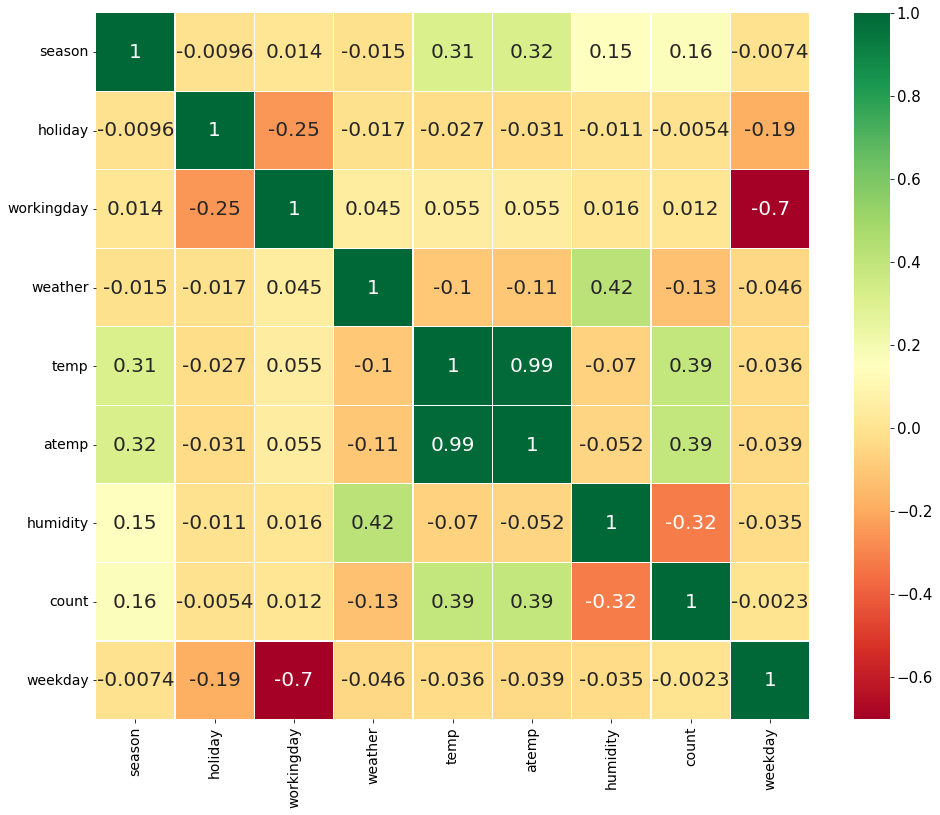

In [ ]:
sns.heatmap(all_data.corr(),annot=True,cmap='RdYlGn',linewidth=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(16,13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()